<h1 style="text-align: center;"> TP 3: Classification d'images de chiffres manuscrits </h1>

<h5 style="text-align: center;"> Auteur: BARGO Alfred</h5>

<h5 style="text-align: center;"> Enseignant: Dr Poulmanogo ILLY
</h5>

## Introduction

La reconnaissance de caractères manuscrits constitue un problème fondamental en vision par ordinateur. Plusieurs programmes ont été proposés, mais demeurent déterministes.
Il est alors nécessaire dans ce sens, de développer des modèles d'apprentissages automatiques qui pourront faire de la reconnaissance des images et pour cela, il faut des données d'entraînement.
Ainsi le **MNIST** (**M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology) est un jeu de données issue des travaux de l'expert [**Yann Le Cun**](http://yann.lecun.com) et est construit à partir de chiffres écrits par des employés du bureau de recensement américain et des lycéens.

Nous avons pour objectif dans ce projet TP spécifique, de créer un modèle de réseau de neurones convolutif (**CNN**) sur la base du dataset MNIST qui maximise le taux de classification.

## I. Description du jeu de données

Souvent considérée comme le "Hello World" de l'IA pour la vision par ordinateur, le jeu de données MNIST contient 70 000 images de format 28 x 28 pixels en gris. Ces images sont celles de chiffres en écriture manuscrits de 0 à 9.

## II. Préparation  du dataset

### II.1 Chargement des bibliothèques 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import joblib
import tensorflow as tf
import numpy as np, random
import warnings
from datetime import datetime

In [2]:
warnings.filterwarnings("ignore")

### II.2 📥Chargement des données

In [3]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

* **Affichage des dimension**

In [4]:
# Affichage des dimensions
print("Données d'entraînement")
print("X_train---->",X_train.shape) 
print("X_train---->",y_train.shape)
print("")
print("Données de test")
print("X_test---->",X_test.shape)
print("y_test---->",y_test.shape)

Données d'entraînement
X_train----> (60000, 28, 28)
X_train----> (60000,)

Données de test
X_test----> (10000, 28, 28)
y_test----> (10000,)


**Interprétation :**

Le jeu de données contient 70 000 images de 28 x 28 pixels déjà séparés en base d'entraînement et base test. Il y a 60 000 images qui constituent la base d'entraînement et 10 000 images qui constituent la base de test (14,28% du dataset).

Cette représentation des données ne peut pas être utilisée pour l'entraînement car elle ne précise pas le canal de l'image. En effet, les données attendues lors de l'entraînement des CNN doivent avoir la structure suivante : **(batch, hauteur, largeur, canaux)**. Le canal même s'il est 1 (image noir blanc) doit être precisé (mais pas 0) car il permet de reconnaître la profondeur sur laquelle appliquer le filtre (lors de la convolution).

Il est donc judicieux de redimensionner les données, et nous le ferons dans la partie prétraitement des données.

* **🖼 Affichage de quelques images**

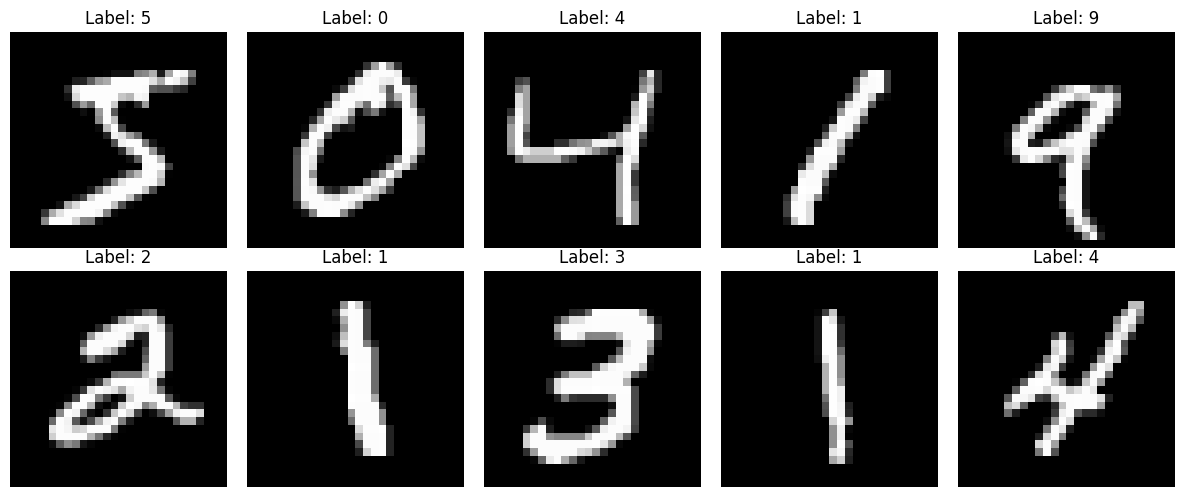

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

**Analyse :**

Un aperçu des images du dataset montre qu'il s'agit bien des images de chiffres manuscrits. On peut remarquer que les images sont déjà labellisées et la valeur de chaque label correspond au chiffre dans l'image. 

**Affichages des distributions des classes**

In [6]:
unique, counts = np.unique(y_train, return_counts=True)
print("\nDistribution des classes dans l'ensemble d'entraînement:")
for val, count in zip(unique, counts):
    print(f"Classe {val}: {count} échantillons ({count/len(y_train)*100:.2f}%)")


Distribution des classes dans l'ensemble d'entraînement:
Classe 0: 5923 échantillons (9.87%)
Classe 1: 6742 échantillons (11.24%)
Classe 2: 5958 échantillons (9.93%)
Classe 3: 6131 échantillons (10.22%)
Classe 4: 5842 échantillons (9.74%)
Classe 5: 5421 échantillons (9.04%)
Classe 6: 5918 échantillons (9.86%)
Classe 7: 6265 échantillons (10.44%)
Classe 8: 5851 échantillons (9.75%)
Classe 9: 5949 échantillons (9.92%)


**Analyse :**

Cet affichage donne le nombre d'images et la proportion de chaque classe dans le jeu de données d'entraînement. La classe la plus représentée est la classe 1 et la classe la moins représenté est celle des chiffres 5.

**Interprétation :**

Les classes dans le jeu d'entraînement ne sont pas trop déséquilibrés 

* **Affichage des valeurs des pixels d'une image**

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Interprétation :**

On remarque que les valeurs des pixels varient entre 0 et 255. Il est donc nécessaire de les normaliser avant l'entraînement du modèle.

### II.3 Pretraîtement des données 

* **Re-dimensionnement des données** 

In [7]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

print("X_train---->",X_train.shape) 
print("X_test----->",X_test.shape) 

X_train----> (60000, 28, 28, 1)
X_test-----> (10000, 28, 28, 1)


* **Normalisation des données**

La normalisation va permettre de mettre les valeurs de tous les pixels dans une même échelle de valeurs comprises entre 0 et 1. Cela permet d'avoir une convergence de la fonction de perte beaucoup plus efficacement.

In [8]:
Xmax=X_train.max()
X_train=X_train/Xmax
X_test=X_test/Xmax

print("Après normalisation:Min={}, Max={}".format({X_train.min()},{X_train.max()})) 

Après normalisation:Min={0.0}, Max={1.0}


## III. Définition, entraînement et  évaluation du modèle

### III.1 Définition du modèle 

In [9]:
def create_cnn_model():
    model=models.Sequential([

        # Première couche de convolution + pooling
        layers.Conv2D(32,(3,3),               # couches avec 32 filtres de tailles 3x3
                      activation='relu',      # Activation ReLU
                      padding='same',         # Application d'un padding pour plus de la considération des bords
                      input_shape=(28,28,1)), # Dimension des données d'entrées (images) 
        #layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),           # MaxPooling de 2 sur 2
        layers.Dropout(0.20),                 # Dropout après pooling

        # Deuxième couche de convolution + pooling
        layers.Conv2D(64,(3,3),               # Convolution avec application de 64 filtres de tailles 3x3
                      activation='relu',
                      padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Mise à plat des données
        layers.Flatten(),

        # Couches entièrement connectés
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        # Couche de sortie (Dix neurones pour la sortie)
        layers.Dense(10, activation='softmax')

    ])
    return model

**Résumé de l'architecture du modèle**:

Nous créons un modèle basique et simple de 2 couches de convolution + pooling et une couche entièrement connecté dans le MLP
*  Première couches de convolution + pooling:
   * Convolution: 32 filtres de taille 3x3; fonction d'activation *ReLU*; application d'un padding pour plus de considération des informations au niveau des bords; l'entrée qui sont les images (28,28,1)
   * MaxPooling: taille 2x2
   * Dropout(mise à zéro) de 20% des neurones de la couche pour éviter que ce soit quelques neurones seulement qui apprennent d'un motif spécifique
* Deuxième couche de convolution+pooling:
    *  Convolution: 64 filtres  de tailles 3x3; fonction d'activation *ReLU*; application d'un padding pour plus de considération des informations au niveau des bords
    *  MaxPooling: taille 2x2
    *  Dropout(mise à zéro) de 25% des neurones de la couche pour éviter que ce soit quelques neurones seulement qui apprennent d'un motif spécifique
* Mise a plat des données: Cela mettra les données dans un format qui pourra être utilisé comme entrée dans le MLP
* MLP: Le réseau par la suite est constituté d'une seule couche cachée entièrement connecté et d'une couche de sortie 
   * couche entièrement connecté: 128 neurones appliqués à une fonction d'activation *ReLU*
   * Application d'un dropout pour éviter le surapprentissage
   * couche de sortie: 10 neurones appliqués à l'activation *softmax* (car c'est une classification multiclasse)

* **Suppression des sessions antérieures et limitation de l'aspect aléatoire dans le choix des poids**

In [10]:
tf.keras.backend.clear_session()

# Fixation pour obtenir des résultats reproductibles
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Analyse**

Ce code est important, car il permet de réduire la variabilité due à l'aspect aléatoire dans l'initialisation des poids du modèle à chaque session. En effet, à chaque session, les poids sont initialisés de façon aléatoire. Ce code va alors permettre, à chaque fois que la session TensorFlow est initialisé, d'éviter toute interférence entres les modèles successifs. 

* **Création d'un modèle et affichage de l'architecture**

In [11]:
# Création d'un modèle
model=create_cnn_model()

# Affichage de l'architecture(résumé)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

**Analyse du modèle :**
* On remarque que les opérations de convolutions produisent moins de paramètres que la couche fully connected.
* Les opérations de Dropout et de MaxPooling ne changent pas le nombre de paramètres

**Interprétation :** 

Cela renforce l'idée selon laquelle les opérations de convolutions et de pooling ont pour rôle d'extraire les caractéristiques de l'image.

* **Compilation du modèle**

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Fonction de perte dans le cas de la classification multiclasses
    metrics=['accuracy']                     # Métrique d'évaluation
)

### III.2 Entraînement du modèle

In [14]:
history=model.fit(
    X_train, y_train,
    epochs=15,               # 15 époques d'entraînement 
    batch_size=130,          # 130 instances dans chaque batch
    validation_split=0.1,    # 10% du jeu de données pour la validation
    verbose=1                # Affichage de détail lors de l'entraînement 
)

Epoch 1/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9018 - loss: 0.3182 - val_accuracy: 0.9795 - val_loss: 0.0659
Epoch 2/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.9680 - loss: 0.1053 - val_accuracy: 0.9865 - val_loss: 0.0497
Epoch 3/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9764 - loss: 0.0797 - val_accuracy: 0.9892 - val_loss: 0.0409
Epoch 4/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9798 - loss: 0.0646 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 5/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9823 - loss: 0.0562 - val_accuracy: 0.9903 - val_loss: 0.0362
Epoch 6/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9848 - loss: 0.0491 - val_accuracy: 0.9910 - val_loss: 0.0317
Epoch 7/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.9860 - loss: 0.0430 - val_accuracy: 0.9920 - val_loss: 0.0283
Epoch 8/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9864 - loss: 0.0414 - 

**Analyse :**

Sur les 15 époques on remarque que la valeur de la fonction de perte sur l'ensemble d'entrainement est en décroissance, par contre celui de l'ensemble de validation varie légèrement (signe d'ajustement du modèle). De plus, les valeurs de la fonction dans les deux ensembles ne sont pas trop éloignées.

La valeur de l'accuracy quant à elle croit de la première époque à la dernière et n'est pas très éloigné de celle sur l'ensemble de validation.

**Interprétation :**

La décroissance du loss tout au long de l'entraînement montre que le modèle apprend bien. La legère différence du loss avec val_loss montre que le modèle arrive à généralisé sur les données de validation tout en ne rentrant pas dans un état de sur-apprentissage.

Nous ne n'utilisons pas ici *GridSearchCV*. En effet, l'entraînement d'un seul modèle CNN nécessite beaucoup de temps et de ressources machine. Puisque  *GridSearchCV* consiste à un entraînement de plusieurs modèles pour choisir le meilleur, cela pourrai nécessité beaucoup de temps et d'importantes ressources machines dont nous ne disposons pas.

### III.3 Évaluation du modèle

* **Courbes d'apprentissage**

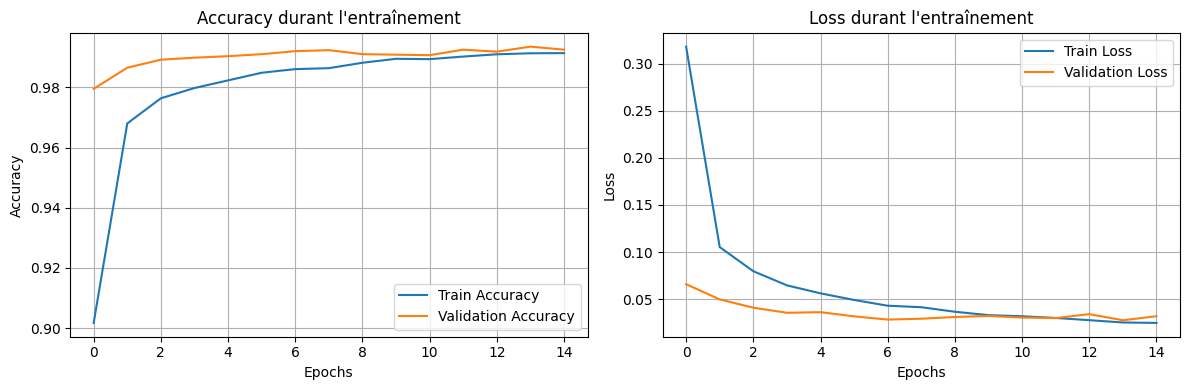

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Courbe d'accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy durant l\'entraînement')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Courbe de loss
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss durant l\'entraînement')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Interprétation**:

Ces courbes montrent les variations de la fonction de perte et de la précision globale du modèle durant l'entraînement. On remarque qu'au début de l'entraînement du modèle, les valeurs de la fonction de perte dans le jeu d'entraînement et dans le jeu de validation ont un certain écart considérable entre eux, mais plus le nombre d'époques augmente plus cet écart devient petit voir même très minime. Cela montre une fois de plus que le modèle apprend au fur et à mesure et généralise bien. 

### III.4 Test final du modèle sur les données de test

* **Fonction de perte et la métriques d'accuracy sur le jeu de test** 

In [16]:
test_loss, test_accuracy=model.evaluate(X_test,y_test, verbose=1)
print(f"\n{'='*50}")
print(f"Résultats sur l'ensemble de test:")
print(f"{'='*50}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9935 - loss: 0.0191

Résultats sur l'ensemble de test:
Accuracy: 0.9935
Loss: 0.0191


**Interprétation**:

La précision globale de la classification est de 99,35 % avec une fonction d'erreur égale à 0.0191. Ces valeurs ne sont pas aussi très éloigné de ceux obtenu sur le jeu d'entraînement et le jeu de validation lors de l'entraînement. Ceci est un signe que le modèle arrive à bien généralisé mais pas trop pour être en ***sous-apprentissage***

* **Prédiction des classes et matrice de confusion**

In [17]:
# Prédiction
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nRapport de classification:")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



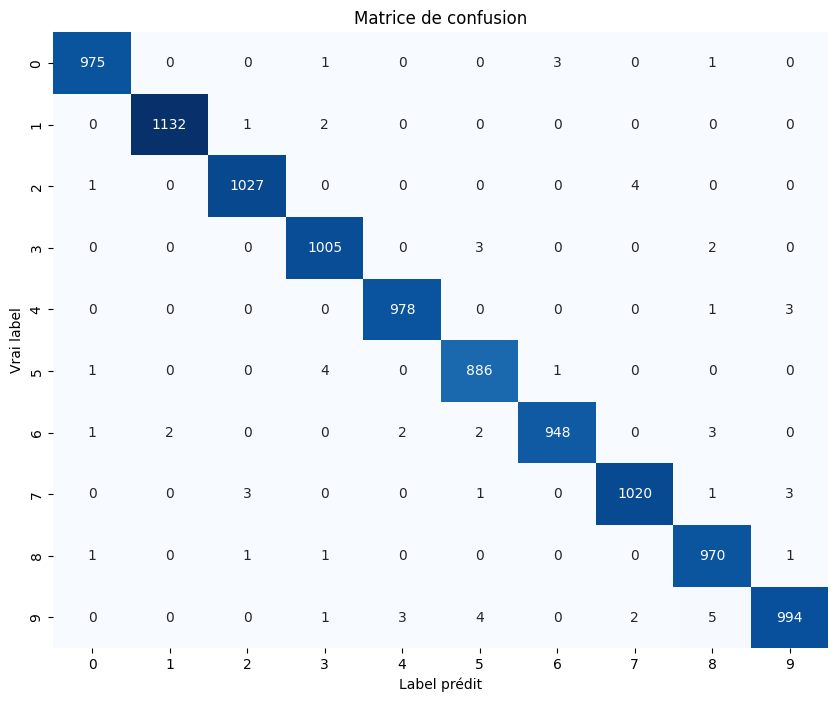

In [18]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)

# Affichage avec seaborn si disponible, sinon avec matplotlib
try:
    import seaborn as sns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
except ImportError:
    plt.imshow(cm, cmap='Blues')
    for i in range(10):
        for j in range(10):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.title('Matrice de confusion')
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
plt.colorbar
plt.show()

**Interprétation :**

Les précisions par classe du modèle sont plutôt satisfaisantes car elles varient entre 0.99 et 1

* **Erreurs de prédiction sur le jeu de test**


Nombre d'erreurs: 65 / 10000
Taux d'erreur: 0.65%


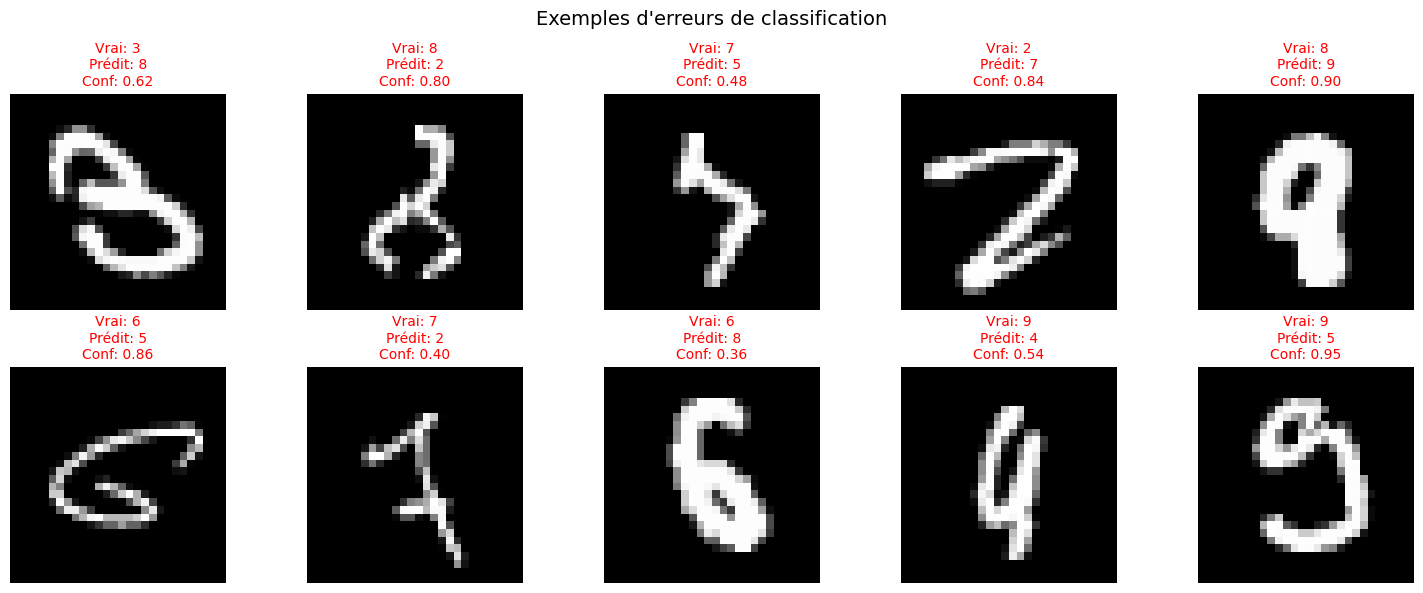

In [19]:
# Étape 12: Analyse des erreurs
errors = y_pred_classes != y_test
if np.any(errors):
    error_indices = np.where(errors)[0]
    print(f"\nNombre d'erreurs: {len(error_indices)} / {len(y_test)}")
    print(f"Taux d'erreur: {len(error_indices)/len(y_test)*100:.2f}%")
    
    # Affichage des premières erreurs
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(min(10, len(error_indices))):
        row, col = i // 5, i % 5
        idx = error_indices[i]
        axes[row, col].imshow(X_test[idx].reshape(28, 28), cmap='gray')
        true_label = y_test[idx]
        pred_label = y_pred_classes[idx]
        confidence = np.max(y_pred[idx])
        
        axes[row, col].set_title(f"Vrai: {true_label}\nPrédit: {pred_label}\nConf: {confidence:.2f}", 
                                color='red', fontsize=10)
        axes[row, col].axis('off')
    
    plt.suptitle('Exemples d\'erreurs de classification', fontsize=14)
    plt.tight_layout()
    plt.show()

**Analyse :**

Cet affichage met en évidence quelques erreurs de prédiction du modèle sur le jeu de données de test. Il y a au total 65 erreurs de prédictions, soit 0,65% d'erreur.

Nous remarquons par ailleurs que les images sur lesquelles le modèle a fait des erreurs de classement sont le plus souvent des images moins nettes et dont la forme du chiffre est difficile à cerner même par un humain. 

## IV. Sauvegarde du modèle

Nous sauvegardons le modèle crée avec la bibliothèque *joblib*. Cela permettra (si on le désir) de créer par la suite une interface utilisateur avec streamlit pour prédire les chiffres dans des images que l'utilisateur aura chargées.

In [20]:
# 7. Sauvegarde du modèle final
joblib.dump(model, 'model3/mnist_model.joblib')

# 8. Sauvegarde des métadonnées
metadata = {
    'input_shape': (28, 28, 1),
    'num_classes': 10,
    'class_names': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    'test_accuracy': float(test_accuracy),
    'test_loss': float(test_loss),
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}
joblib.dump(metadata, 'model3/model_metadata.pkl')

['model3/model_metadata.pkl']

## Conclusion

En résumé, nous avons construit un modèle de **réseau de neurones convolutif** (CNN) pour la classification d'images de chiffres manuscrits provenant du jeu de données MNIST. Ce modèle prédit avec un taux d'erreur de moins de 1 % les classes des images qui sont étiquetées de 0 à 9.